**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Menghang Wu
- Cecilia Lin
- Julie Cai
- Yunfei Shih
- Guan Huang Chen

# Research Question

Is there a statistically significant difference in the preference for hybrid plug-in vehicles versus battery electric vehicles (EVs) across the counties in Washington?

## Background and Prior Work

In recent years, heightened concerns over climate change and air pollution have drawn significant attention to sustainable transportation. Electric vehicles (EVs) and hybrid vehicles are gaining traction across the United States, particularly in eco-conscious states like Washington. These vehicles are essential for reducing greenhouse gas emissions and lowering dependency on fossil fuels. Additionally, rising fuel prices are prompting more consumers to consider electric or fuel-efficient hybrid options.

Although both governments and businesses actively promote the electric vehicle market, consumer preferences vary considerably by region, especially in the choice between hybrid vehicles and battery electric vehicles (BEVs). Understanding these regional preferences offers valuable insights for assessing market demand and shaping policies that support a smoother transition toward electrification in the transportation sector.

Prior studies indicate that preferences for EVs and hybrids differ across geographic regions. In a study by Nelder and Jung (2016)<a name="cite_ref-1.1"></a>[<sup>1</sup>](#cite_note-1.1), factors influencing the adoption of EVs were examined, including the distribution of charging infrastructure, vehicle range, and geographic characteristics. These factors significantly impact the efficiency of both hybrid and electric vehicles, influencing consumer preferences for each type across different areas.

Another relevant study by Morrissey et al. (2016)<a name="cite_ref-1.2"></a>[<sup>2</sup>](#cite_note-1.2) analyzed EV adoption patterns in several European countries, focusing on urban versus rural regions. They found that urban consumers were more inclined to choose BEVs due to readily available charging infrastructure, whereas rural areas favored hybrids, given their flexibility in regions with limited charging options. This research supports the notion that consumer preferences for hybrids and BEVs may vary based on infrastructure and geography, aligning closely with our research question of whether statistically significant preference differences exist across Washington counties.

References:
1. <a name="cite_note-1.1"></a> [^](#cite_ref-1)Nelder, C., & Jung, C. (2016). The future of electric vehicles in the U.S.: Forecasts and projections. Rocky Mountain Institute.https://rmi.org

2. <a name="cite_note-1.2"></a> [^](#cite_ref-2)Morrissey, P., Weldon, P., & O'Mahony, M. (2016). Future standard and fast charging infrastructure planning: An analysis of charging behaviour in EV-ready urban regions. Journal of Transport Geography.
https://www.infona.pl/resource/bwmeta1.element.elsevier-5c9e73d4-17a4-38da-ae24-db1598cce4d7


# Hypothesis


We predict that the counties across Washington has a statistically significant preference for battery electric vehicles (BEVs) over hybrid plug-in vehicle. The preference will be measure by the ratio of BEV and plug-in vehicle across the counties. We believe that people perfer BEVs more because the price of BEVs is lower than hybrid vehicles and consumers do not need to be concerned with the fluctuating price of gasoline.

# Data

## Data overview

- Dataset #1
  - Dataset Name: Electric Vehicle Population Data
  - Link to the dataset: https://catalog.data.gov/dataset/electric-vehicle-population-data
  - Number of observations: 210162
  - Number of variables: 17

The dataset includes all electric car registered across the counties in Washington state, and the model year of the EVs varied from 1999 to 2025. It has 210162 rows of observations as the population, and we could sample randomly from the dataset if needed. The dataset allows us to conduct for statistical analysis since the samples would be over 1000 observations.

Most of the variables are categorical variables, stored as string, such as County, City, Model Year, Make, and Electric Vehicle Type. There are only two quantitative variables stored as float, which is Electric Range and Base MSRP. Electric Range describes the distance that EV can travel on a single charge of its battery, while Base MSRP describes the manufacturer price of a EV without any additional features.

The important variables of the dataset for our project are County and Electric Vehicle Type. The County column includes the county of the EV is registered in, and the Electric Vehicle Type identifies the vehicle as Plug-in Hybrid Electric Vehicle (PHEV) or Battery Electric Vehicle (BEV). ANother variable that we might dive into would be Base MSRP since we think there would be more BEVs due to the cheaper price.

To prepare for the analysis, we could store the dataset as a Pandas dataframe, drop uncessary features to lessen computational burden, check missing values, and ensure correct data types for features. We would also group by the EV by counties to gain insight on the percent ratio of BEVs and PHEVs across the counties.

## Electric Vehicle Population Data

In [61]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import geoplot as gplt

In [62]:
ev_population = pd.read_csv('Electric_Vehicle_Population_Data.csv')
ev_population.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,5YJ3E1EB1J,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,475911439,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
2,WP0AD2A73G,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,0.0,1.0,101971278,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10


In [63]:
#check number of observations and variables
ev_population.shape

(210165, 17)

In [64]:
#check datatypes
ev_population.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [65]:
# drop irrevelant columns and keep variables that we might use for analysis
ev_clean = ev_population.drop(columns = ['VIN (1-10)', 
                                         'Legislative District', 
                                         'DOL Vehicle ID',  
                                         'Electric Utility', 
                                         '2020 Census Tract',
                                         'Vehicle Location'
                                        ])
ev_clean.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0
1,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0
2,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,0.0
3,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0
4,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0


In [66]:
#check for missing values
ev_clean.isna().any()

County                                                True
City                                                  True
State                                                False
Postal Code                                           True
Model Year                                           False
Make                                                 False
Model                                                False
Electric Vehicle Type                                False
Clean Alternative Fuel Vehicle (CAFV) Eligibility    False
Electric Range                                        True
Base MSRP                                             True
dtype: bool

In [67]:
ev_clean.isna().sum()

County                                               4
City                                                 4
State                                                0
Postal Code                                          4
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       5
Base MSRP                                            5
dtype: int64

The data is very well maintained that there is not a lot of missing values. We will dive deeper to see what are some possible missing values entries.

In [68]:
ev_clean['Base MSRP'].value_counts().head()

Base MSRP
0.0        206851
69900.0      1334
31950.0       367
52900.0       221
32250.0       142
Name: count, dtype: int64

There is missing values and 0 for base MSRP, a base MSRP does not make sense since a car without additional features would still not cost $0, so we will replace with nan.

In [69]:
ev_clean['Base MSRP'] = ev_clean['Base MSRP'].replace(0, np.nan)

We will drop all the missing values since we have a lot of data in the dataset, and filling in the quantative columns could lead to bias. For the categorical variables, we do not have a way to fill in missing values other than randomly assign the vehicle to a county or city, and this could lead to significant bias in the analysis. Thus, we decide to drop all missing values.

In [70]:
ev_clean = ev_clean.dropna()
ev_clean.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
13,Thurston,Olympia,WA,98502.0,2012,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,265.0,59900.0
92,Thurston,Lacey,WA,98516.0,2018,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16.0,52650.0
268,King,Sammamish,WA,98074.0,2012,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,265.0,59900.0
284,King,Kirkland,WA,98034.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0
290,King,Seattle,WA,98101.0,2018,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,45600.0


In [71]:
ev_clean.isna().any()

County                                               False
City                                                 False
State                                                False
Postal Code                                          False
Model Year                                           False
Make                                                 False
Model                                                False
Electric Vehicle Type                                False
Clean Alternative Fuel Vehicle (CAFV) Eligibility    False
Electric Range                                       False
Base MSRP                                            False
dtype: bool

In [72]:
ev_clean.head(3)

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
13,Thurston,Olympia,WA,98502.0,2012,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,265.0,59900.0
92,Thurston,Lacey,WA,98516.0,2018,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16.0,52650.0
268,King,Sammamish,WA,98074.0,2012,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,265.0,59900.0


Now that the data is cleaned, we will start diving into the relationships across the variables.

In [73]:
ev_clean['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            2092
Plug-in Hybrid Electric Vehicle (PHEV)    1216
Name: count, dtype: int64

In [74]:
#look at the distribution of the vehicle types across counties
ev_count_by_county = ev_clean.groupby(['County','Electric Vehicle Type'])['City'].size().reset_index(name='Count')
ev_count_by_county

,County,Electric Vehicle Type,Count
0,Adams,Plug-in Hybrid Electric Vehicle (PHEV),1
1,Albemarle,Battery Electric Vehicle (BEV),1
2,Asotin,Battery Electric Vehicle (BEV),2
3,Benton,Battery Electric Vehicle (BEV),25
4,Benton,Plug-in Hybrid Electric Vehicle (PHEV),13
...,...,...,...
68,Whatcom,Battery Electric Vehicle (BEV),76
69,Whatcom,Plug-in Hybrid Electric Vehicle (PHEV),29
70,Whitman,Battery Electric Vehicle (BEV),2
71,Yakima,Battery Electric Vehicle (BEV),13


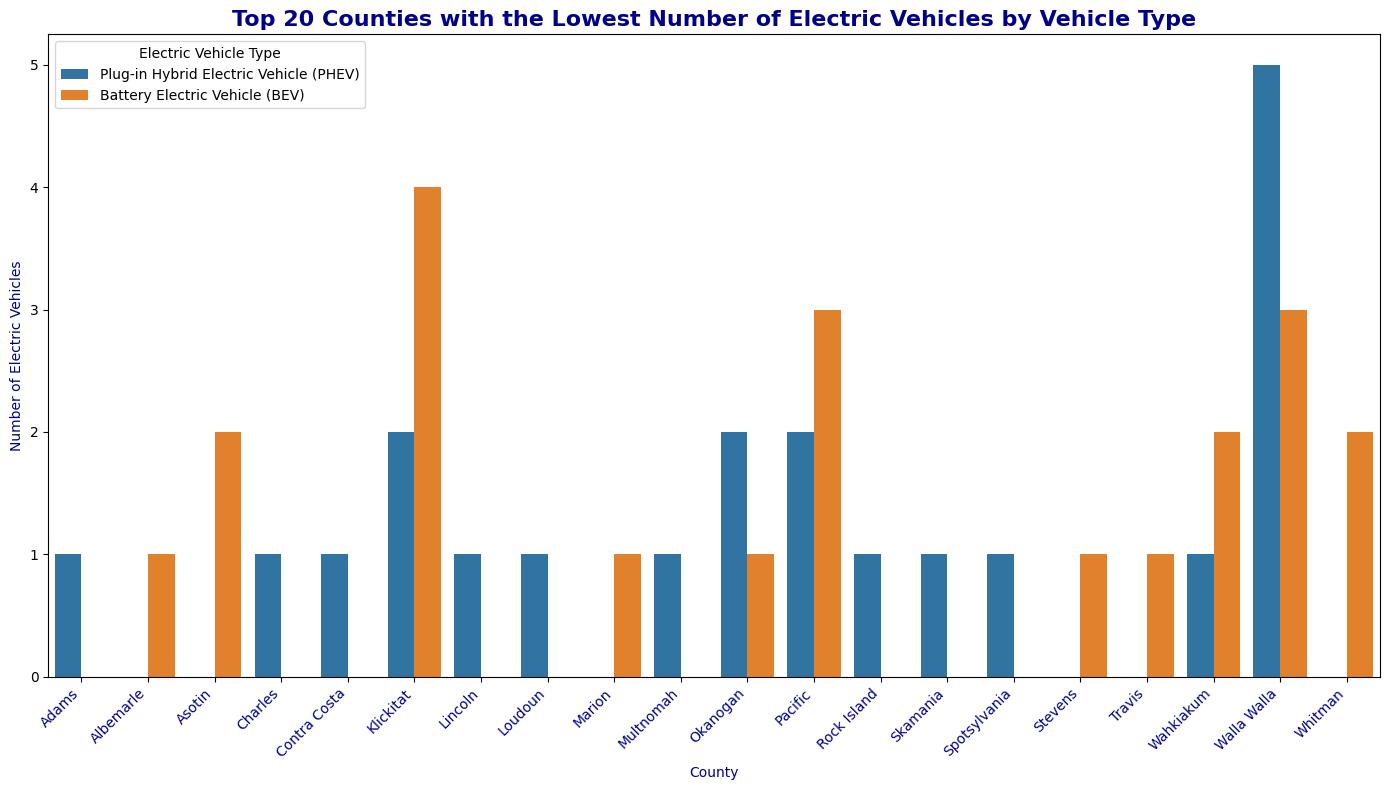

In [75]:
county_total_ev = ev_count_by_county.groupby('County')['Count'].sum().sort_values()

#get the rural counties (defined as counties with lowes EVs counts)
ev_count_by_county_sorted = ev_count_by_county.groupby('County')['Count'].sum().sort_values().head(20)

ev_count_filtered = ev_count_by_county[ev_count_by_county['County'].isin(ev_count_by_county_sorted.index)]

plt.figure(figsize=(14, 8))
sns.barplot(x='County', y='Count', hue='Electric Vehicle Type', data=ev_count_filtered)
plt.title('Top 20 Counties with the Lowest Number of Electric Vehicles by Vehicle Type', fontsize=16,fontweight='bold', color='darkblue')
plt.xlabel('County', color='darkblue')
plt.ylabel('Number of Electric Vehicles', color='darkblue')
plt.xticks(rotation=45, ha='right', color='darkblue')
plt.tight_layout()

plt.show()


In [76]:
ev_clean['Make'].value_counts()

Make
TESLA                   1511
KIA                      581
BMW                      507
VOLVO                    310
MINI                     156
CHRYSLER                 115
SUBARU                    66
PORSCHE                   35
FISKER                    13
CADILLAC                  11
WHEEGO ELECTRIC CARS       3
Name: count, dtype: int64

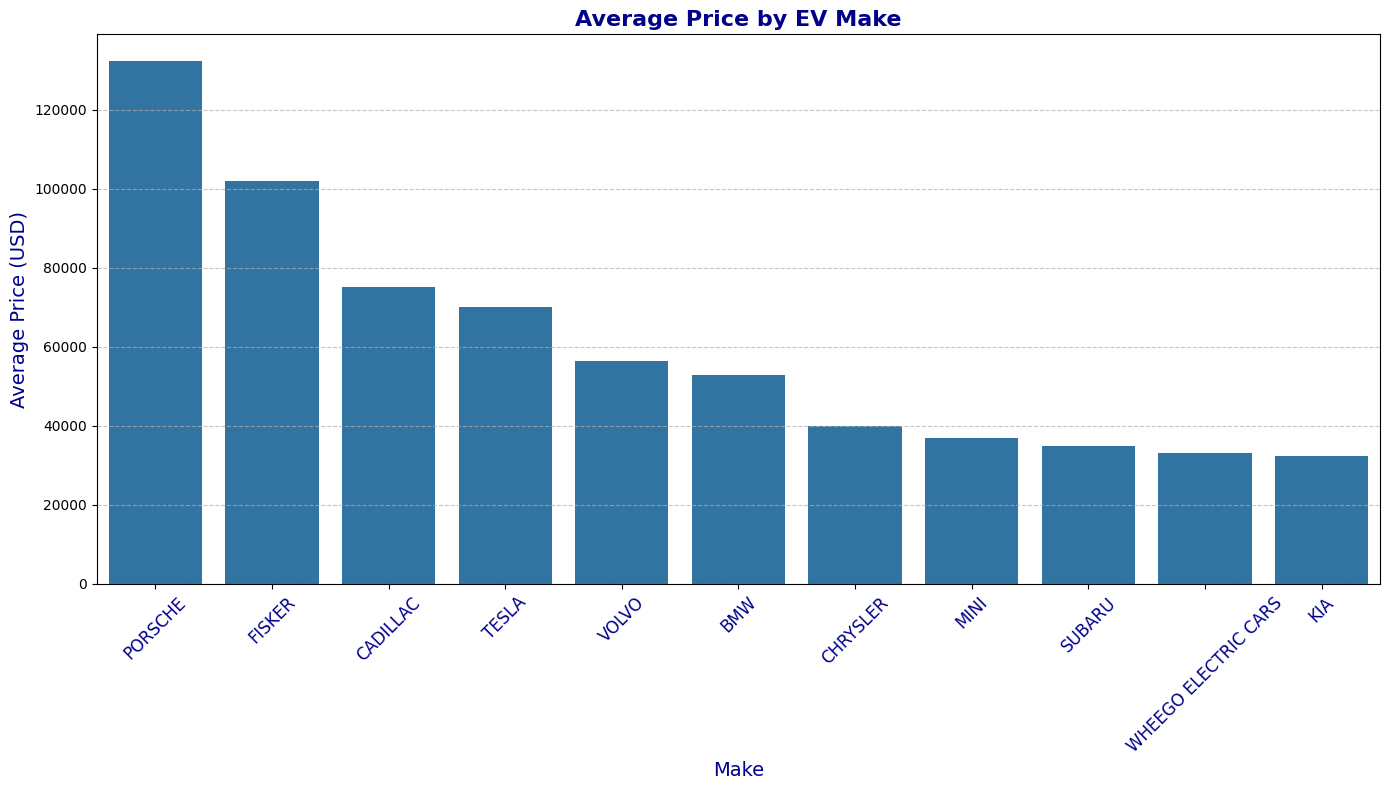

In [77]:
price_by_make = ev_clean.groupby('Make')['Base MSRP'].mean().sort_values(ascending=False)

# Visualize
plt.figure(figsize=(14, 8))
sns.barplot(x=price_by_make.index, y=price_by_make.values)
plt.title("Average Price by EV Make", fontsize=16,fontweight='bold', color='darkblue')
plt.xlabel("Make", fontsize=14, color='darkblue')
plt.ylabel("Average Price (USD)", fontsize=14, color='darkblue')
plt.xticks(rotation=45, fontsize=12, color='darkblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

#### Distribution of BEVs and PHEVs

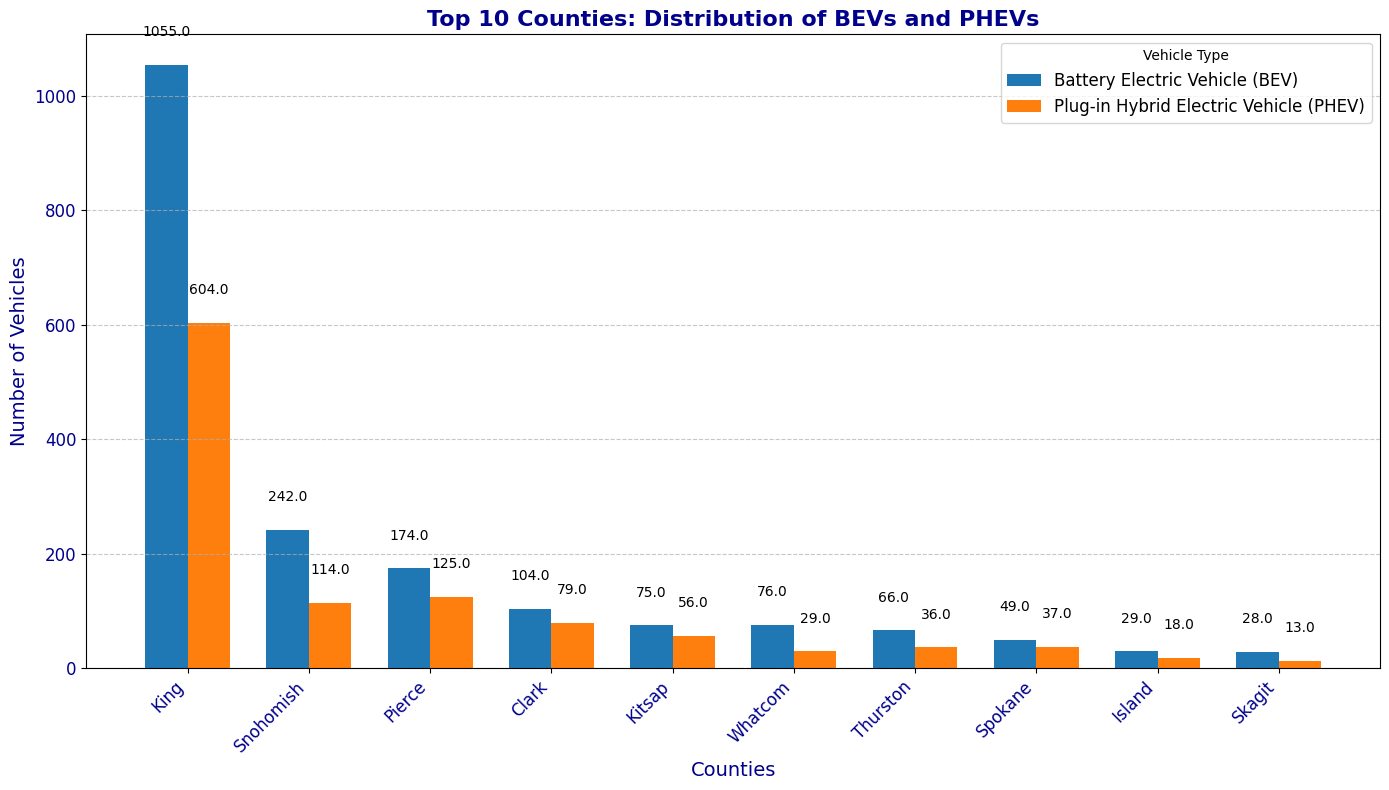

In [78]:
# Filter the top 10 counties by total EV count

county_type_counts = (
    ev_clean.groupby(['County', 'Electric Vehicle Type']).size().unstack()
)


#Add a 'Total' column for the total EV count in each county
county_type_counts['Total'] = county_type_counts.sum(axis=1)

#Select the top 10 counties by total EV count
top_counties = county_type_counts.nlargest(10, 'Total').index
filtered_data_top = county_type_counts.loc[top_counties]

# Plotting
bar_width = 0.35
indices = range(len(filtered_data_top))

plt.figure(figsize=(14, 8))

# Plot Battery Electric Vehicle (BEV) counts
plt.bar(indices, 
        filtered_data_top['Battery Electric Vehicle (BEV)'], 
        bar_width, 
        label='Battery Electric Vehicle (BEV)', 
        )

# Plot Plug-in Hybrid Electric Vehicle (PHEV) counts
plt.bar([i + bar_width for i in indices], 
        filtered_data_top['Plug-in Hybrid Electric Vehicle (PHEV)'], 
        bar_width, 
        label='Plug-in Hybrid Electric Vehicle (PHEV)', 
        )

plt.title('Top 10 Counties: Distribution of BEVs and PHEVs',fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Counties', fontsize=14, color='darkblue')
plt.ylabel('Number of Vehicles', fontsize=14, color='darkblue')
plt.xticks([i + bar_width / 2 for i in indices], filtered_data_top.index, fontsize=12, color='darkblue', rotation=45, ha='right')
plt.yticks(fontsize=12, color='darkblue')
plt.legend(title="Vehicle Type", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with exact values
for i, county in enumerate(filtered_data_top.index):
    plt.text(i, 
             filtered_data_top.loc[county, 'Battery Electric Vehicle (BEV)'] + 50, 
             str(filtered_data_top.loc[county, 'Battery Electric Vehicle (BEV)']), 
             ha='center', fontsize=10)
    plt.text(i + bar_width, 
             filtered_data_top.loc[county, 'Plug-in Hybrid Electric Vehicle (PHEV)'] + 50, 
             str(filtered_data_top.loc[county, 'Plug-in Hybrid Electric Vehicle (PHEV)']), 
             ha='center', fontsize=10)

plt.tight_layout()
plt.show()

<center>(figure 1)</center>

We can see from the figure 1 that the number of BEVs in each county is higher than that of PHEVs. In some counties, the ratio of the two types of vehicles is particularly different, such as King and Snohomish. The number of BEVs is almost 4-5 times that of PHEVs. Therefore, we can see from this data that in the use of electric vehicles, consumers' preference for BEVs is significantly higher than that for PHEVs. And in terms of the acceptance and usage rate of new energy vehicles, the more economically developed regions will be higher. Countries like King have a greate amount of BEVs and PHEVs showing the economic development of the country is strong, these places would have more charging stations for the BEVs to use, which would make them be more convinient.

#### Electric Vehicle Types

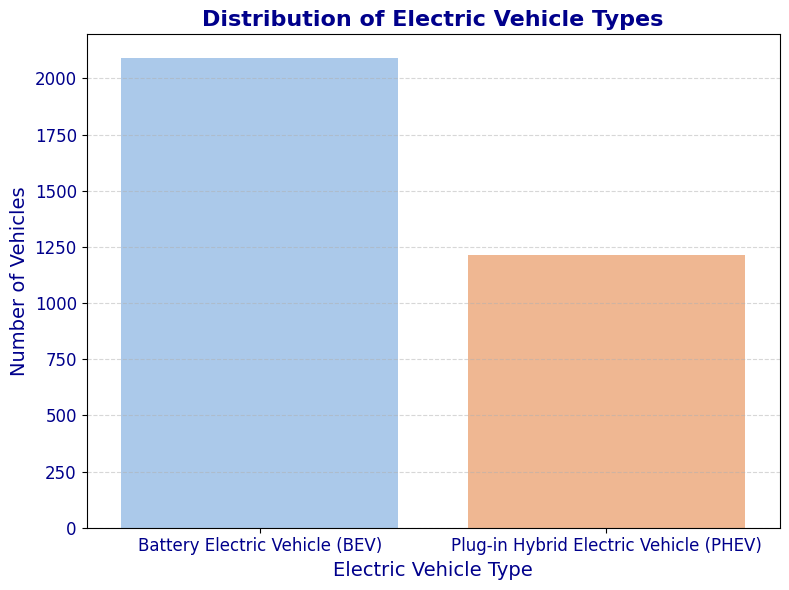

In [79]:
# Calculate the counts for each vehicle type
ev_type_counts = ev_clean['Electric Vehicle Type'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))

# Future-proof sns.barplot
sns.barplot(
    x=ev_type_counts.index,
    y=ev_type_counts.values,
    palette="pastel",
    hue=ev_type_counts.index,  # Explicitly assign hue
    dodge=False,  # Ensures bars aren't split into groups
    legend=False  # Suppress the legend since hue=x
)

# Add labels and titles
plt.title('Distribution of Electric Vehicle Types', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Electric Vehicle Type', fontsize=14, color='darkblue')
plt.ylabel('Number of Vehicles', fontsize=14, color='darkblue')
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

<center>(figure 2)</center>

This chart shows the distribution of the total number of vehicles of the two types of electric vehicles. We can clearly see that the number of BEVs is significantly higher than that of PHEVs. This also proves that the acceptance of BEVs will be higher than that of PHEVs. The reason for this may be that the technology of BEV is equivalent to that of PHEV, and the government's subsidy policy is more inclined towards BEV. BEV usually have simpler designs and gets more benefit from the battery improvement. Comparing to PHEV, BEV have a greater ranges and chiper maintainance. Government also provides a higher subsidies and incentives for BEVs as they are more environmental friendly.

#### Electric Range vs. Base MSRP by Vehicle Type

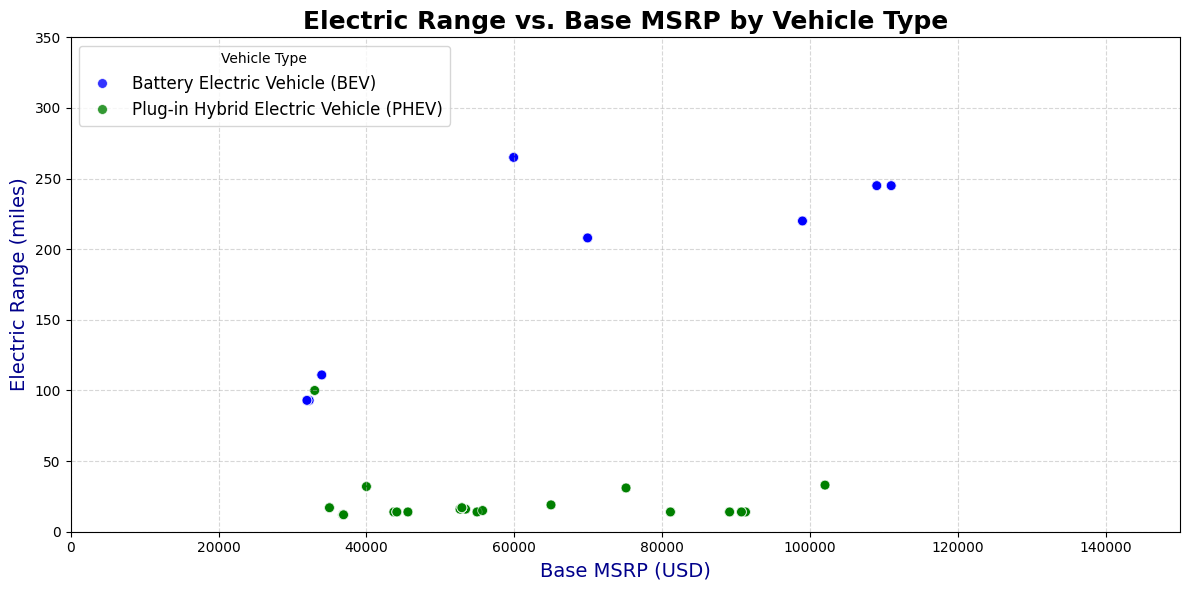

In [80]:
# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=ev_clean, 
    x='Base MSRP', 
    y='Electric Range', 
    hue='Electric Vehicle Type', 
    alpha=0.8, 
    palette={'Battery Electric Vehicle (BEV)': 'blue', 'Plug-in Hybrid Electric Vehicle (PHEV)': 'green'},
    s=50  # Set marker size for better readability
)

# Limit axes to focus on relevant data
plt.xlim(0, 150000)  # Focus on MSRP less than 150,000
plt.ylim(0, 350)     # Electric range capped at 350 miles

# Title and Labels
plt.title('Electric Range vs. Base MSRP by Vehicle Type', fontsize=18, fontweight='bold')
plt.xlabel('Base MSRP (USD)', fontsize=14, color='darkblue')
plt.ylabel('Electric Range (miles)', fontsize=14,color='darkblue')
plt.legend(title='Vehicle Type', fontsize=12, loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.5)

# Improve layout
plt.tight_layout()
plt.show()

# Interpretation:
# This scatter plot focuses on relevant price and range data. BEVs generally have higher ranges
# but also higher MSRPs compared to PHEVs. This supports the hypothesis that consumers prefer BEVs for their range advantage.

<center>(figure 3)</center>

We can see from the figure 3 that the cruising range of BEVs is significantly higher than that of PHEVs. With a small difference between the price, the cruising range of BEVs is much more higher than that of PHEVs. Therefore, this will also lead consumers to prefer BEVs with a higher cruising range at the same price. The graph also illustrates the improvement of the battery technique.

# Ethics & Privacy

**Issues with Privacy and Terms of Use:**

1. The data set including information on vehicle population, school buses, ZEV sales, hydrogen refueling stations, and EV chargers may have specific privacy and terms of use problems. For example, the frequency of someone using a EV charger at a specific location. The data also has location information, such as the zip code and city. The zip code and car make along with VIN could possibly identify the owner for someone who lives in the same zip code. 

**Mitigation of Privacy Risks:**

2. The team will carefully review by and use the data by the term of use for the datasets to make sure that privacy standards are maintained. We would also use aggregation techniques to make sure that no individual or small group can be identified based on the location or frequency of EV infrastructure usage. To solve these privacy issues, our team will implement stric data handling, with clear promise to protect personal and community level privacy throughout the research. We only conduct analysis focusing on the necessary variables, like county and type of vehicle, to avoid any potential privacy issue.



Our team acknowledges that this project might have some potential ethics or privacy issues. However, we shall address all potential biases or privacy concerns regarding the use of the data.

We used the data from data.wa.gov, “Electric Vehicle Population Data," which is intended for public access and use. Our question is about the difference in the preference for hybrid plug-in vehicles versus battery electric vehicles across the counties in Washington. We acknowledge that the data we use is only from Washington State, so it might be limited in expanding the analyses to other states due to various factors. However, this dataset comprises 210,165 samples, each originating from different counties in Washington. The dataset's use and analysis could apply to similar counties with minor ethical or bias issues.


# Team Expectations 


* *Communicate via Text. Respond to text within 24 hours. Weekly virtual meetings to finish weekly tasks.*
* *Respectfully give feedback. Do not be blunt or rude.*
* *Unanimous decision, but if there’s disagreement, then the decision will be made by majority vote.*
* *Cecilia will be the facilitator to ensure the project is on track for completion.*
* *No other specific roles, but tasks will be assigned or voluntarily taken.*
* *The load of tasks should be fair and equal among the team members.*
* *A list of current tasks and upcoming meetings will be posted in the group chat announcements section.*
* *When issues arise, communicate early with the team. Seek help from the team as soon as possible if you need it.*
* *If not able to finish certain tasks one time, take more load of the task next time*

# Project Timeline Proposal


| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 10/25  |  10 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research, assign sections | 
| 10/30  | 5 PM  |Finish draft of proposal; Search for datasets  | Revise and submit proposal |
| 11/14 | 6 PM  | Cecilia finishes EDA| Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part |
| 11/20 | 6 PM  | Import & Wrangle Data; EDA | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 11/27 | 10 PM  | Finalize wrangling/EDA; Begin Analysis | Discuss/edit Analysis; Complete project check-in |
| 12/4 |5 PM  | Complete analysis; Draft results/conclusion/discussion| Discuss/edit full project |
| 12/11 | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |